Содержание:

- Задание

- Импорт библиотек и подключение google диска

- Прогнозирование акций Лукойл
  
  - Работа с таблицей

  - Задание 1.
    - 1.1 Попарные разности каналов:
    - 1.2 Модули попарных разностей каналов:
    - 1.3 Попарные произведения каналов:
    - 1.4 Обратное значение каналов
    - 1.5 Первые производные каналов
    - 1.6 Вторые производные каналов
  
    - Добавление в таблицу
    
    - Общая таблица
    - Графики
      - График всей таблицы
      - Попарные разности каналов:
      - Модули попарных разностей каналов:
      - Попарные произведения каналов:
      - Обратное значение каналов:
      - Первые производные каналов:
      - Вторые производные каналов:

  - Задание 2. Сделайте предсказание нейросети, сравните эталонный сигнал с настоящим. При формировании входного сигнала используйте:
  - Загрузка данных
  - 2.1 - 100 точек с шагом назад по 1
  - Дополнительные функции визуализации результатов
  - Нейронная сеть с Dense слоем
    - lr = 1e-4
    - Уменьшаем шаг обучения lr=1e-5
      - График lr=1e-5
    - Прогноз данных, отображение на графике
    - График корреляции
    - График корреляции со смещением шага

  - Попробуем подать те же данные в нейроннуя сеть с Conv1D и посмотреть на результат.
    - Шаг обучения lr=1e-4
    - Меняем шаг обучения lr=1e-5
        - График lr=1e-5
    - Прогноз данных, отображение на графике (lr=1e-5)
    - График корреляции (lr=1e-5)
    - График корреляции со смещением шага (lr=1e-5)

  - Задание 2.2 - 100 точек с шагом назад по 10 (или сами точки, или среднее по отрезку в 10 точек)
    - Возьмем ту же архитектуру нейронной сети с Dense слоем
      - lr = 1e-4
      - Уменьшаем шаг обучения lr=1e-5
        - График lr=1e-5
      - Прогноз данных, отображение на графике
      - График корреляции
      - График корреляции со смещением шага

  - Попробуем подать те же данные в нейроннуя сеть с LSTM и посмотреть на результат.
    - Обучение сети (шаг обучения lr=1e-5)
      -График lr=1e-5
    - Прогноз данных, отображение на графике (lr=1e-5)
    - График корреляции (lr=1e-5)
    - График корреляции со смещением шага (lr=1e-5)

- Выводы

# Задание Pro

Сделайте несколько усовершенствований в предсказании временного ряда

1. Добавьте к исходному временному ряду следующие данные, в виде новых каналов:

попарные разности каналов

модули попарных разностей каналов

попарные произведения каналов

обратное значение каналов x_new = 1/(x + 1e-3)

первые производные каналов (x[n] - x[n-1])

вторые производные каналов (x[n] - 2*x[n-1] + x[n-2])

2. Сделайте предсказание нейросети, сравните эталонный сигнал с 

настоящим. При формировании входного сигнала используйте:

 - 100 точек с шагом назад по 1

 - 100 точек с шагом назад по 10 (или сами точки, или среднее по отрезку в 10 точек)

# Импорт библиотек и подключение google диска

In [ ]:
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D, MaxPooling1D, RepeatVector, Input, concatenate
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Прогнозирование акций Лукойл

## Работа с таблицей

In [ ]:
# Считываем данные и присваеваем переменной с помощью pandas
# Загрузим данные за 16-17 и 18-19 годы
data16_17 = pd.read_csv('/content/drive/MyDrive/Временные ряды/База акции Лукойла/16_17.csv', sep=';')
data18_19 = pd.read_csv('/content/drive/MyDrive/Временные ряды/База акции Лукойла/18_19.csv', sep=';')

In [ ]:
# Убираем колонки DATE и TIME
data16_17 = data16_17.iloc[:,2:]
data18_19 = data18_19.iloc[:,2:]

In [ ]:
# Объединяем две базы в одну

data = pd.concat([data16_17, data18_19])

In [ ]:
data.head()

,OPEN,MAX,MIN,CLOSE,VOLUME
0,2351.0,2355.8,2350.0,2350.0,2547
1,2352.9,2355.7,2350.0,2355.7,195
2,2355.6,2356.0,2351.4,2354.1,257
3,2354.5,2355.0,2351.2,2353.7,763
4,2353.1,2353.9,2353.1,2353.6,231


## Задание 1. 


Для начала определим какие столбцы будут добавлены в таблицу к уже имеющимся :
OPEN	MAX	MIN	CLOSE	VOLUME

  - **Попарные разности каналов:**
   
      OPEN-MAX, OPEN-MIN, OPEN-CLOSE, OPEN-VOLUME,

      MAX-OPEN, MAX-MIN , MAX-CLOSE, MAX-VOLUME, 

      MIN-OPEN, MIN-MAX, MIN-CLOSE, MIN-VOLUME,

      CLOSE-OPEN, CLOSE-MAX, CLOSE-MIN, CLOSE-VOLUME

      VOLUME-OPEN, VOLUME-MAX, VOLUME-MIN, VOLUME-CLOSE

       - В связи с тем, что далее мы будем брать модуль разности каналов, то в зависимости от данных столбцы могут повторяться. Например MAX-OPEN и MAX-CLOSE могут соответствовать модулю этих разниц. Но не смотря на это оставим данные столбцы и проверим как будет нейронная сеть предсказывать результат. 
---


      	
   - **Модули попарных разностей каналов:**

      |OPEN-MAX|, |OPEN-MIN|, |OPEN-CLOSE|, |OPEN-VOLUME|,

      |MAX-MIN|, |MAX-CLOSE|, |MAX-VOLUME|,

      |MIN-CLOSE|, |MIN-VOLUME|,

      |CLOSE-VOLUME|



---


- **Попарные произведения каналов:**

  OPEN * MAX, OPEN * MIN, OPEN * CLOSE, OPEN * VOLUME

	MAX * MIN, 	MAX * CLOSE, MAX * VOLUME

	MIN * CLOSE, MIN * VOLUME,
      
  CLOSE * VOLUME	



---



  - **Обратное значение каналов x_new = 1/(x + 1e-3):**

   rev_OPEN 
   
   rev_MAX 
   
   rev_MIN

   rev_CLOSE
   
   rev_VOLUME


---



- **Первые производные каналов (x[n] - x[n-1]):**

  diff_OPEN 
   
  diff_MAX 
   
  diff_MIN

  diff_CLOSE
   
  diff_VOLUME



---


 - **Вторые производные каналов** (x[n] - 2*x[n-1] + x[n-2])
 
  diff2_OPEN 
   
  diff2_MAX 
   
  diff2_MIN

  diff2_CLOSE
   
  diff2_VOLUME


	

 - Таким образом = 20 + 10*2 + 15 + 5 (которые исходные) = 60

### 1.1 Попарные разности каналов:

In [ ]:
# Попарные разности каналов:

# В связи с тем, что далее мы будем брать модуль разности каналов, то в зависимости от данных столбцы могут повторяться. 
# Например MAX-OPEN и MAX-CLOSE могут соответствовать модулю этих разниц. 
# Но не смотря на это оставим данные столбцы и проверим как будет нейронная сеть предсказывать результат.

data['OPEN-MAX']    =  data.iloc[:,0] - data.iloc[:,1]
data['OPEN-MIN']    =  data.iloc[:,0] - data.iloc[:,2]
data['OPEN-CLOSE']  =  data.iloc[:,0] - data.iloc[:,3]
data['OPEN-VOLUME'] =  data.iloc[:,0] - data.iloc[:,4]

data['MAX-OPEN']    =  data.iloc[:,1] - data.iloc[:,0]
data['MAX-MIN']     =  data.iloc[:,1] - data.iloc[:,2]
data['MAX-CLOSE']   =  data.iloc[:,1] - data.iloc[:,3]
data['MAX-VOLUME']  =  data.iloc[:,1] - data.iloc[:,4]

data['MIN-OPEN']    =  data.iloc[:,2] - data.iloc[:,0]
data['MIN-MAX']     =  data.iloc[:,2] - data.iloc[:,1]
data['MIN-CLOSE']   =  data.iloc[:,2] - data.iloc[:,3]
data['MIN-VOLUME']  =  data.iloc[:,2] - data.iloc[:,4]


data['CLOSE-OPEN']   = data.iloc[:,3] - data.iloc[:,0]
data['CLOSE-MAX']    = data.iloc[:,3] - data.iloc[:,1]
data['CLOSE-MIN']    = data.iloc[:,3] - data.iloc[:,2]
data['CLOSE-VOLUME'] = data.iloc[:,3] - data.iloc[:,4]

data['VOLUME-OPEN']  = data.iloc[:,4] - data.iloc[:,0]
data['VOLUME-MAX']   = data.iloc[:,4] - data.iloc[:,1]
data['VOLUME-MIN']   = data.iloc[:,4] - data.iloc[:,2]
data['VOLUME-CLOSE'] = data.iloc[:,4] - data.iloc[:,3]

In [ ]:
data.head(1)     # Добавили разность каналов, 25 столбцов

,OPEN,MAX,MIN,CLOSE,VOLUME,OPEN-MAX,OPEN-MIN,OPEN-CLOSE,OPEN-VOLUME,MAX-OPEN,MAX-MIN,MAX-CLOSE,MAX-VOLUME,MIN-OPEN,MIN-MAX,MIN-CLOSE,MIN-VOLUME,CLOSE-OPEN,CLOSE-MAX,CLOSE-MIN,CLOSE-VOLUME,VOLUME-OPEN,VOLUME-MAX,VOLUME-MIN,VOLUME-CLOSE
0,2351.0,2355.8,2350.0,2350.0,2547,-4.8,1.0,1.0,-196.0,4.8,5.8,5.8,-191.2,-1.0,-5.8,0.0,-197.0,-1.0,-5.8,0.0,-197.0,196.0,191.2,197.0,197.0


### 1.2 Модули попарных разностей каналов:

In [ ]:
# Модули попарных разностей каналов:
# Раз до этого мы уже вычислили значения, то проще взять модуль abs от этих столбцов, чем сначала считать разность, а потом брать модуль.

data['|OPEN-MAX|']     = abs(data['OPEN-MAX'])
data['|OPEN-MIN|']     = abs(data['OPEN-MIN'])
data['|OPEN-CLOSE|']   = abs(data['OPEN-CLOSE'])
data['|OPEN-VOLUME|']  = abs(data['OPEN-VOLUME'])

data['|MAX-MIN|']      = abs(data['MAX-MIN'])
data['|MAX-CLOSE|']    = abs(data['MAX-CLOSE'])
data['|MAX-VOLUME|']   = abs(data['MAX-VOLUME'])

data['|MIN-CLOSE|']    = abs(data['MIN-CLOSE'])
data['|MIN-VOLUME|']   = abs(data['MIN-VOLUME'])

data['|CLOSE-VOLUME|'] = abs(data['CLOSE-VOLUME'])



In [ ]:
data.head(1)    # Добавили модуль разностей каналов, 35 столбцов

,OPEN,MAX,MIN,CLOSE,VOLUME,OPEN-MAX,OPEN-MIN,OPEN-CLOSE,OPEN-VOLUME,MAX-OPEN,MAX-MIN,MAX-CLOSE,MAX-VOLUME,MIN-OPEN,MIN-MAX,MIN-CLOSE,MIN-VOLUME,CLOSE-OPEN,CLOSE-MAX,CLOSE-MIN,CLOSE-VOLUME,VOLUME-OPEN,VOLUME-MAX,VOLUME-MIN,VOLUME-CLOSE,|OPEN-MAX|,|OPEN-MIN|,|OPEN-CLOSE|,|OPEN-VOLUME|,|MAX-MIN|,|MAX-CLOSE|,|MAX-VOLUME|,|MIN-CLOSE|,|MIN-VOLUME|,|CLOSE-VOLUME|
0,2351.0,2355.8,2350.0,2350.0,2547,-4.8,1.0,1.0,-196.0,4.8,5.8,5.8,-191.2,-1.0,-5.8,0.0,-197.0,-1.0,-5.8,0.0,-197.0,196.0,191.2,197.0,197.0,4.8,1.0,1.0,196.0,5.8,5.8,191.2,0.0,197.0,197.0


### 1.3 Попарные произведения каналов:

In [ ]:
# Попарные произведения каналов:

data['OPEN*MAX']     = data.iloc[:,0] * data.iloc[:,1]
data['OPEN*MIN']     = data.iloc[:,0] * data.iloc[:,2]
data['OPEN*CLOSE']   = data.iloc[:,0] * data.iloc[:,3]
data['OPEN*VOLUME']  = data.iloc[:,0] * data.iloc[:,4]

data['MAX*MIN']      = data.iloc[:,1] * data.iloc[:,2]
data['MAX*CLOSE']    = data.iloc[:,1] * data.iloc[:,3]
data['MAX*VOLUME']   = data.iloc[:,1] * data.iloc[:,4]

data['MIN*CLOSE']    = data.iloc[:,2] * data.iloc[:,3]
data['MIN*VOLUME']   = data.iloc[:,2] * data.iloc[:,4]

data['CLOSE*VOLUME'] = data.iloc[:,3] * data.iloc[:,4]

In [ ]:
data.head(1)    # Добавили произведение каналов, 45 столбцов

,OPEN,MAX,MIN,CLOSE,VOLUME,OPEN-MAX,OPEN-MIN,OPEN-CLOSE,OPEN-VOLUME,MAX-OPEN,MAX-MIN,MAX-CLOSE,MAX-VOLUME,MIN-OPEN,MIN-MAX,MIN-CLOSE,MIN-VOLUME,CLOSE-OPEN,CLOSE-MAX,CLOSE-MIN,CLOSE-VOLUME,VOLUME-OPEN,VOLUME-MAX,VOLUME-MIN,VOLUME-CLOSE,|OPEN-MAX|,|OPEN-MIN|,|OPEN-CLOSE|,|OPEN-VOLUME|,|MAX-MIN|,|MAX-CLOSE|,|MAX-VOLUME|,|MIN-CLOSE|,|MIN-VOLUME|,|CLOSE-VOLUME|,OPEN*MAX,OPEN*MIN,OPEN*CLOSE,OPEN*VOLUME,MAX*MIN,MAX*CLOSE,MAX*VOLUME,MIN*CLOSE,MIN*VOLUME,CLOSE*VOLUME
0,2351.0,2355.8,2350.0,2350.0,2547,-4.8,1.0,1.0,-196.0,4.8,5.8,5.8,-191.2,-1.0,-5.8,0.0,-197.0,-1.0,-5.8,0.0,-197.0,196.0,191.2,197.0,197.0,4.8,1.0,1.0,196.0,5.8,5.8,191.2,0.0,197.0,197.0,5538485.8,5524850.0,5524850.0,5987997.0,5536130.0,5536130.0,6000222.6,5522500.0,5985450.0,5985450.0


### 1.4 Обратное значение каналов

In [ ]:
# Обратное значение каналов x_new = 1/(x + 1e-3):

# х - это элемент столбца, а n - это его порядковый номер

data['rev_OPEN']   = 1 / (data['OPEN'] + 0.001)
data['rev_MAX']    = 1 / (data['MAX'] + 0.001)
data['rev_MIN']    = 1 / (data['MIN'] + 0.001) 
data['rev_CLOSE']  = 1 / (data['CLOSE'] + 0.001)
data['rev_VOLUME'] = 1 / (data['VOLUME'] + 0.001)


In [ ]:
data.head(1)    # Добавили обратное значение каналов, 50 столбцов

,OPEN,MAX,MIN,CLOSE,VOLUME,OPEN-MAX,OPEN-MIN,OPEN-CLOSE,OPEN-VOLUME,MAX-OPEN,MAX-MIN,MAX-CLOSE,MAX-VOLUME,MIN-OPEN,MIN-MAX,MIN-CLOSE,MIN-VOLUME,CLOSE-OPEN,CLOSE-MAX,CLOSE-MIN,CLOSE-VOLUME,VOLUME-OPEN,VOLUME-MAX,VOLUME-MIN,VOLUME-CLOSE,|OPEN-MAX|,|OPEN-MIN|,|OPEN-CLOSE|,|OPEN-VOLUME|,|MAX-MIN|,|MAX-CLOSE|,|MAX-VOLUME|,|MIN-CLOSE|,|MIN-VOLUME|,|CLOSE-VOLUME|,OPEN*MAX,OPEN*MIN,OPEN*CLOSE,OPEN*VOLUME,MAX*MIN,MAX*CLOSE,MAX*VOLUME,MIN*CLOSE,MIN*VOLUME,CLOSE*VOLUME,rev_OPEN,rev_MAX,rev_MIN,rev_CLOSE,rev_VOLUME
0,2351.0,2355.8,2350.0,2350.0,2547,-4.8,1.0,1.0,-196.0,4.8,5.8,5.8,-191.2,-1.0,-5.8,0.0,-197.0,-1.0,-5.8,0.0,-197.0,196.0,191.2,197.0,197.0,4.8,1.0,1.0,196.0,5.8,5.8,191.2,0.0,197.0,197.0,5538485.8,5524850.0,5524850.0,5987997.0,5536130.0,5536130.0,6000222.6,5522500.0,5985450.0,5985450.0,0.000425,0.000424,0.000426,0.000426,0.000393


### 1.5 Первые производные каналов

In [ ]:
# Первые производные каналов (x[n] - x[n-1])
# х - это элемент столбца, а n - это его порядковый номер

data['diff_OPEN']   = data.iloc[:,0].diff()      # Эквивалент записи float(data['diff_OPEN']) = float(data['OPEN'][i:i+1] )- data.['OPEN][i-1:i] если делать в цикле
data['diff_MAX']    = data.iloc[:,1].diff()
data['diff_MIN']    = data.iloc[:,2].diff()
data['diff_CLOSE']  = data.iloc[:,3].diff()
data['diff_VOLUME'] = data.iloc[:,4].diff()


In [ ]:
# Черновик

#data['diff_OPEN'] = np.nan

In [ ]:
#data.diff_OPEN[2] = float(data.OPEN[2:3]) - float(data.OPEN[1:2#])
#float(df.OPEN[i:i+1]) - float(df.OPEN[i-1:i]
#data.diff_OPEN[1] = data.OPEN[2] - data.OPEN[1]

In [ ]:
#print(data['OPEN'][2:3])
#print(data['OPEN'][1:2])
#print(data.OPEN[0:1])

In [ ]:
#data['diff_OPEN'][1:2]

In [ ]:
data.head(2)    # Добавили первые производные каналов, 55 столбцов

,OPEN,MAX,MIN,CLOSE,VOLUME,OPEN-MAX,OPEN-MIN,OPEN-CLOSE,OPEN-VOLUME,MAX-OPEN,MAX-MIN,MAX-CLOSE,MAX-VOLUME,MIN-OPEN,MIN-MAX,MIN-CLOSE,MIN-VOLUME,CLOSE-OPEN,CLOSE-MAX,CLOSE-MIN,CLOSE-VOLUME,VOLUME-OPEN,VOLUME-MAX,VOLUME-MIN,VOLUME-CLOSE,|OPEN-MAX|,|OPEN-MIN|,|OPEN-CLOSE|,|OPEN-VOLUME|,|MAX-MIN|,|MAX-CLOSE|,|MAX-VOLUME|,|MIN-CLOSE|,|MIN-VOLUME|,|CLOSE-VOLUME|,OPEN*MAX,OPEN*MIN,OPEN*CLOSE,OPEN*VOLUME,MAX*MIN,MAX*CLOSE,MAX*VOLUME,MIN*CLOSE,MIN*VOLUME,CLOSE*VOLUME,rev_OPEN,rev_MAX,rev_MIN,rev_CLOSE,rev_VOLUME,diff_OPEN,diff_MAX,diff_MIN,diff_CLOSE,diff_VOLUME
0,2351.0,2355.8,2350.0,2350.0,2547,-4.8,1.0,1.0,-196.0,4.8,5.8,5.8,-191.2,-1.0,-5.8,0.0,-197.0,-1.0,-5.8,0.0,-197.0,196.0,191.2,197.0,197.0,4.8,1.0,1.0,196.0,5.8,5.8,191.2,0.0,197.0,197.0,5538485.80,5524850.0,5524850.00,5987997.0,5536130.0,5536130.00,6000222.6,5522500.0,5985450.0,5985450.0,0.000425,0.000424,0.000426,0.000426,0.000393,NaN,NaN,NaN,NaN,NaN
1,2352.9,2355.7,2350.0,2355.7,195,-2.8,2.9,-2.8,2157.9,2.8,5.7,0.0,2160.7,-2.9,-5.7,-5.7,2155.0,2.8,0.0,5.7,2160.7,-2157.9,-2160.7,-2155.0,-2160.7,2.8,2.9,2.8,2157.9,5.7,0.0,2160.7,5.7,2155.0,2160.7,5542726.53,5529315.0,5542726.53,458815.5,5535895.0,5549322.49,459361.5,5535895.0,458250.0,459361.5,0.000425,0.000425,0.000426,0.000425,0.005128,1.9,-0.1,0.0,5.7,-2352.0


### 1.6 Вторые производные каналов

#### Черновик

In [ ]:
# Черновик
#print(data['OPEN'][3:4])
#print(data['OPEN'][2:3])


In [ ]:
#data['diff2_OPEN'] = np.nan

In [ ]:
#data.head(1)

In [ ]:
#(x[n] - 2*x[n-1] + x[n-2]
#data['diff2_OPEN'][2] = float(data['OPEN'][2:3]) - 2*float(data['OPEN'][1:2]) + float(data['OPEN'][0:1])

In [ ]:
#data.head(3)

In [ ]:
# Применим нахождение диффиринциала ко всему каналу OPEN
#data['diff2_OPEN'][2:] = np.diff(data['OPEN'], 2)

In [ ]:
#data.head(3)   # Добавили вторые производные каналов, 60 столбцов

In [ ]:
# Значение 0.8 совпадают, оба варианта работают

#### Добавление в таблицу

In [ ]:
# Сначала создадим пустые столбцы, так как производные второго порядка, то заносить в таблицу будем начиная со второй строки

data['diff2_OPEN']   = np.nan
data['diff2_MAX']    = np.nan
data['diff2_MIN']    = np.nan
data['diff2_CLOSE']  = np.nan
data['diff2_VOLUME'] = np.nan

In [ ]:
# Вторые производные каналов (x[n] - 2*x[n-1] + x[n-2])
# х - это элемент столбца, а n - это его порядковый номер

data['diff2_OPEN'][2:]   = np.diff(data['OPEN'], 2)    # Эквивалент записи float(df.OPEN[i:i+1]) - 2*float(df.OPEN[i-1:i]) + float(df.OPEN[i-2:i-1]) в цикле
data['diff2_MAX'][2:]    = np.diff(data['MAX'], 2)
data['diff2_MIN'][2:]    = np.diff(data['MIN'], 2)
data['diff2_CLOSE'][2:]  = np.diff(data['CLOSE'], 2)
data['diff2_VOLUME'][2:] = np.diff(data['VOLUME'], 2)

In [ ]:
data.head(3)

,OPEN,MAX,MIN,CLOSE,VOLUME,OPEN-MAX,OPEN-MIN,OPEN-CLOSE,OPEN-VOLUME,MAX-OPEN,MAX-MIN,MAX-CLOSE,MAX-VOLUME,MIN-OPEN,MIN-MAX,MIN-CLOSE,MIN-VOLUME,CLOSE-OPEN,CLOSE-MAX,CLOSE-MIN,CLOSE-VOLUME,VOLUME-OPEN,VOLUME-MAX,VOLUME-MIN,VOLUME-CLOSE,|OPEN-MAX|,|OPEN-MIN|,|OPEN-CLOSE|,|OPEN-VOLUME|,|MAX-MIN|,|MAX-CLOSE|,|MAX-VOLUME|,|MIN-CLOSE|,|MIN-VOLUME|,|CLOSE-VOLUME|,OPEN*MAX,OPEN*MIN,OPEN*CLOSE,OPEN*VOLUME,MAX*MIN,MAX*CLOSE,MAX*VOLUME,MIN*CLOSE,MIN*VOLUME,CLOSE*VOLUME,rev_OPEN,rev_MAX,rev_MIN,rev_CLOSE,rev_VOLUME,diff_OPEN,diff_MAX,diff_MIN,diff_CLOSE,diff_VOLUME,diff2_OPEN,diff2_MAX,diff2_MIN,diff2_CLOSE,diff2_VOLUME
0,2351.0,2355.8,2350.0,2350.0,2547,-4.8,1.0,1.0,-196.0,4.8,5.8,5.8,-191.2,-1.0,-5.8,0.0,-197.0,-1.0,-5.8,0.0,-197.0,196.0,191.2,197.0,197.0,4.8,1.0,1.0,196.0,5.8,5.8,191.2,0.0,197.0,197.0,5538485.80,5524850.00,5524850.00,5987997.0,5536130.0,5536130.00,6000222.6,5522500.00,5985450.0,5985450.0,0.000425,0.000424,0.000426,0.000426,0.000393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2352.9,2355.7,2350.0,2355.7,195,-2.8,2.9,-2.8,2157.9,2.8,5.7,0.0,2160.7,-2.9,-5.7,-5.7,2155.0,2.8,0.0,5.7,2160.7,-2157.9,-2160.7,-2155.0,-2160.7,2.8,2.9,2.8,2157.9,5.7,0.0,2160.7,5.7,2155.0,2160.7,5542726.53,5529315.00,5542726.53,458815.5,5535895.0,5549322.49,459361.5,5535895.00,458250.0,459361.5,0.000425,0.000425,0.000426,0.000425,0.005128,1.9,-0.1,0.0,5.7,-2352.0,NaN,NaN,NaN,NaN,NaN
2,2355.6,2356.0,2351.4,2354.1,257,-0.4,4.2,1.5,2098.6,0.4,4.6,1.9,2099.0,-4.2,-4.6,-2.7,2094.4,-1.5,-1.9,2.7,2097.1,-2098.6,-2099.0,-2094.4,-2097.1,0.4,4.2,1.5,2098.6,4.6,1.9,2099.0,2.7,2094.4,2097.1,5549793.60,5538957.84,5545317.96,605389.2,5539898.4,5546259.60,605492.0,5535430.74,604309.8,605003.7,0.000425,0.000424,0.000425,0.000425,0.003891,2.7,0.3,1.4,-1.6,62.0,0.8,0.4,1.4,-7.3,2414.0


#### Можно в цикле (но требуется на данную операцию больше времени)

In [ ]:
# Закоментировал чтобы даный код не запускался 
# for i in range(2, len(data['OPEN'])):
#   data['diff2_OPEN']  [i] = round(float(data.OPEN[i:i+1])   - 2*float(data.OPEN[i-1:i])   + float(data.OPEN[i-2:i-1]),   2)
#   data['diff2_MAX']   [i] = round(float(data.MAX[i:i+1])    - 2*float(data.MAX[i-1:i])    + float(data.MAX[i-2:i-1]),    2)
#   data['diff2_MIN']   [i] = round(float(data.MIN[i:i+1])    - 2*float(data.MIN[i-1:i])    + float(data.MIN[i-2:i-1]),    2)
#   data['diff2_CLOSE'] [i] = round(float(data.CLOSE[i:i+1])  - 2*float(data.CLOSE[i-1:i])  + float(data.CLOSE[i-2:i-1]),  2)
#   data['diff2_VOLUME'][i] = round(float(data.VOLUME[i:i+1]) - 2*float(data.VOLUME[i-1:i]) + float(data.VOLUME[i-2:i-1]), 2)

**Результат аналогичный, но стоит заметить что встроенная функция diff в библиотеке numpy работает намного быстрее чем цикл for.**

### Общая таблица

In [ ]:
# Заменим значение NaN в первых строках на ноль
data.fillna(0, inplace=True)

# Удалять первые строки не будем

In [ ]:
data.head(5)

,OPEN,MAX,MIN,CLOSE,VOLUME,OPEN-MAX,OPEN-MIN,OPEN-CLOSE,OPEN-VOLUME,MAX-OPEN,MAX-MIN,MAX-CLOSE,MAX-VOLUME,MIN-OPEN,MIN-MAX,MIN-CLOSE,MIN-VOLUME,CLOSE-OPEN,CLOSE-MAX,CLOSE-MIN,CLOSE-VOLUME,VOLUME-OPEN,VOLUME-MAX,VOLUME-MIN,VOLUME-CLOSE,|OPEN-MAX|,|OPEN-MIN|,|OPEN-CLOSE|,|OPEN-VOLUME|,|MAX-MIN|,|MAX-CLOSE|,|MAX-VOLUME|,|MIN-CLOSE|,|MIN-VOLUME|,|CLOSE-VOLUME|,OPEN*MAX,OPEN*MIN,OPEN*CLOSE,OPEN*VOLUME,MAX*MIN,MAX*CLOSE,MAX*VOLUME,MIN*CLOSE,MIN*VOLUME,CLOSE*VOLUME,rev_OPEN,rev_MAX,rev_MIN,rev_CLOSE,rev_VOLUME,diff_OPEN,diff_MAX,diff_MIN,diff_CLOSE,diff_VOLUME,diff2_OPEN,diff2_MAX,diff2_MIN,diff2_CLOSE,diff2_VOLUME
0,2351.0,2355.8,2350.0,2350.0,2547,-4.8,1.0,1.0,-196.0,4.8,5.8,5.8,-191.2,-1.0,-5.8,0.0,-197.0,-1.0,-5.8,0.0,-197.0,196.0,191.2,197.0,197.0,4.8,1.0,1.0,196.0,5.8,5.8,191.2,0.0,197.0,197.0,5538485.80,5524850.00,5524850.00,5987997.0,5536130.00,5536130.00,6000222.6,5522500.00,5985450.0,5985450.0,0.000425,0.000424,0.000426,0.000426,0.000393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2352.9,2355.7,2350.0,2355.7,195,-2.8,2.9,-2.8,2157.9,2.8,5.7,0.0,2160.7,-2.9,-5.7,-5.7,2155.0,2.8,0.0,5.7,2160.7,-2157.9,-2160.7,-2155.0,-2160.7,2.8,2.9,2.8,2157.9,5.7,0.0,2160.7,5.7,2155.0,2160.7,5542726.53,5529315.00,5542726.53,458815.5,5535895.00,5549322.49,459361.5,5535895.00,458250.0,459361.5,0.000425,0.000425,0.000426,0.000425,0.005128,1.9,-0.1,0.0,5.7,-2352.0,0.0,0.0,0.0,0.0,0.0
2,2355.6,2356.0,2351.4,2354.1,257,-0.4,4.2,1.5,2098.6,0.4,4.6,1.9,2099.0,-4.2,-4.6,-2.7,2094.4,-1.5,-1.9,2.7,2097.1,-2098.6,-2099.0,-2094.4,-2097.1,0.4,4.2,1.5,2098.6,4.6,1.9,2099.0,2.7,2094.4,2097.1,5549793.60,5538957.84,5545317.96,605389.2,5539898.40,5546259.60,605492.0,5535430.74,604309.8,605003.7,0.000425,0.000424,0.000425,0.000425,0.003891,2.7,0.3,1.4,-1.6,62.0,0.8,0.4,1.4,-7.3,2414.0
3,2354.5,2355.0,2351.2,2353.7,763,-0.5,3.3,0.8,1591.5,0.5,3.8,1.3,1592.0,-3.3,-3.8,-2.5,1588.2,-0.8,-1.3,2.5,1590.7,-1591.5,-1592.0,-1588.2,-1590.7,0.5,3.3,0.8,1591.5,3.8,1.3,1592.0,2.5,1588.2,1590.7,5544847.50,5535900.40,5541786.65,1796483.5,5537076.00,5542963.50,1796865.0,5534019.44,1793965.6,1795873.1,0.000425,0.000425,0.000425,0.000425,0.001311,-1.1,-1.0,-0.2,-0.4,506.0,-3.8,-1.3,-1.6,1.2,444.0
4,2353.1,2353.9,2353.1,2353.6,231,-0.8,0.0,-0.5,2122.1,0.8,0.8,0.3,2122.9,0.0,-0.8,-0.5,2122.1,0.5,-0.3,0.5,2122.6,-2122.1,-2122.9,-2122.1,-2122.6,0.8,0.0,0.5,2122.1,0.8,0.3,2122.9,0.5,2122.1,2122.6,5538962.09,5537079.61,5538256.16,543566.1,5538962.09,5540139.04,543750.9,5538256.16,543566.1,543681.6,0.000425,0.000425,0.000425,0.000425,0.004329,-1.4,-1.1,1.9,-0.1,-532.0,-0.3,-0.1,2.1,0.3,-1038.0


In [ ]:
# Общий размер таблицы
data.shape

(481872, 60)

In [ ]:
# Сохраним полученную таблицу, чтобы не приходилось каждый раз делать вычисления

np.save('/content/drive/MyDrive/Временные ряды/База акции Лукойла/all_16-17-18-19', data)

# В формате csv
data.to_csv('/content/drive/MyDrive/Временные ряды/База акции Лукойла/all_16-17-18-19.csv', encoding='utf-8', sep='\t')

In [ ]:
# При необходимости можно раскоментировать и загрузить таблицу
# data = np.load('/content/drive/MyDrive/Временные ряды/База акции Лукойла/all_16-17-18-19.csv', sep='\t') 

### Графики

In [ ]:
# Для начала переведем в numpy массив
data = np.array(data)

#### График всей таблицы

**Выводить сразу все каналы на одном графике будет не информативно, так как данные разного порядка.**

No handles with labels found to put in legend.


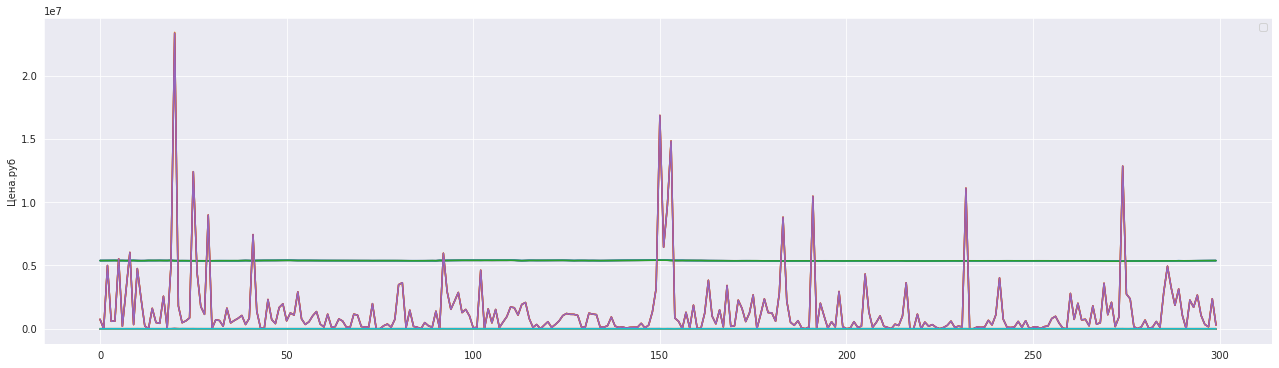

In [ ]:
start = 100            
length = 300 

plt.figure(figsize=(22,6))
for i in range(60):
  plt.plot(data[start:start+length,i])
plt.ylabel('Цена.руб')
plt.legend()
plt.show()

#### Попарные разности каналов:

No handles with labels found to put in legend.


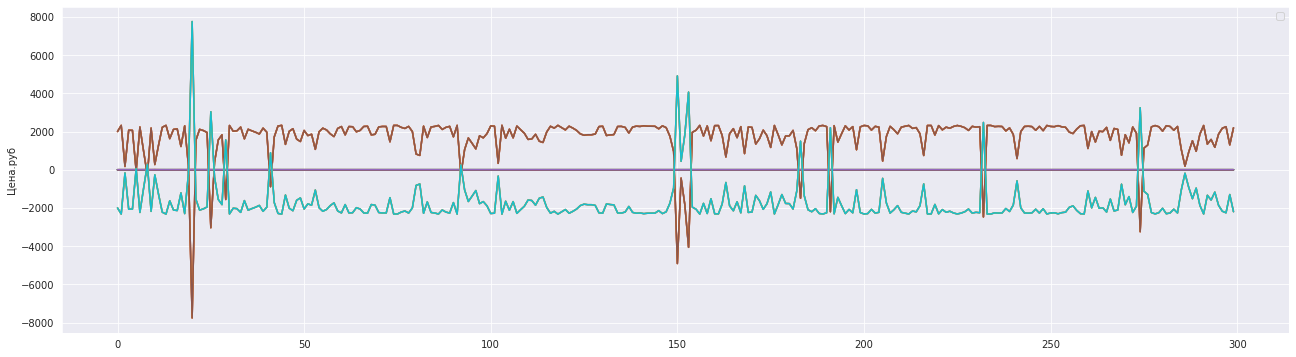

In [ ]:
start = 100            
length = 300 

chanelNames = ['OPEN-MAX', 'OPEN-MIN', 'OPEN-CLOSE', 'OPEN-VOLUME',

      'MAX-OPEN', 'MAX-MIN' , 'MAX-CLOSE', 'MAX-VOLUME', 

      'MIN-OPEN', 'MIN-MAX', 'MIN-CLOSE', 'MIN-VOLUME',

      'CLOSE-OPEN', 'CLOSE-MAX', 'CLOSE-MIN', 'CLOSE-VOLUME',

      'VOLUME-OPEN', 'VOLUME-MAX', 'VOLUME-MIN', 'VOLUME-CLOSE']

plt.figure(figsize=(22,6))
for i in range(5,25):
  plt.plot(data[start:start+length,i])
plt.ylabel('Цена.руб')
plt.legend()
plt.show()

#### Модули попарных разностей каналов:


No handles with labels found to put in legend.


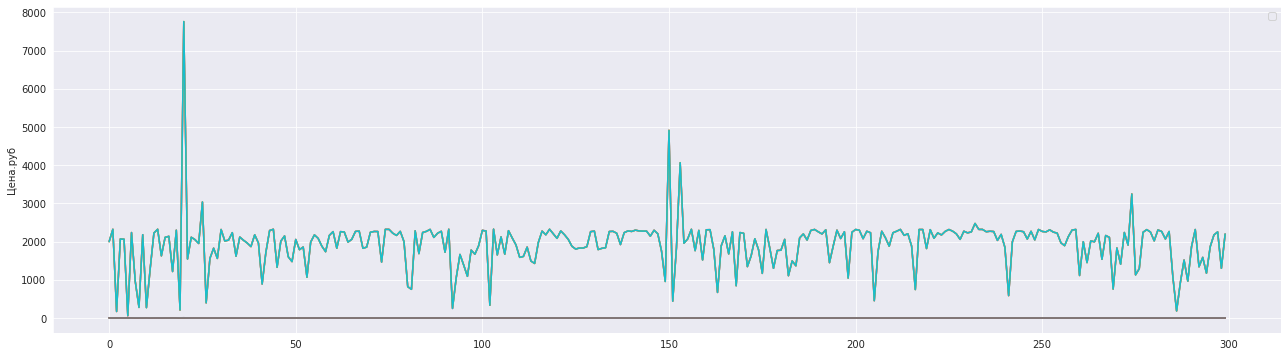

In [ ]:
start = 100            
length = 300 

chanelNames = ['OPEN-MAX', 'OPEN-MIN', 'OPEN-CLOSE', 'OPEN-VOLUME',

      'MAX-OPEN', 'MAX-MIN' , 'MAX-CLOSE', 'MAX-VOLUME', 

      'MIN-OPEN', 'MIN-MAX', 'MIN-CLOSE', 'MIN-VOLUME',

      'CLOSE-OPEN', 'CLOSE-MAX', 'CLOSE-MIN', 'CLOSE-VOLUME',

      'VOLUME-OPEN', 'VOLUME-MAX', 'VOLUME-MIN', 'VOLUME-CLOSE']

plt.figure(figsize=(22,6))
for i in range(25,35):
  plt.plot(data[start:start+length,i])
plt.ylabel('Цена.руб')
plt.legend()
plt.show()

#### Попарные произведения каналов:



No handles with labels found to put in legend.


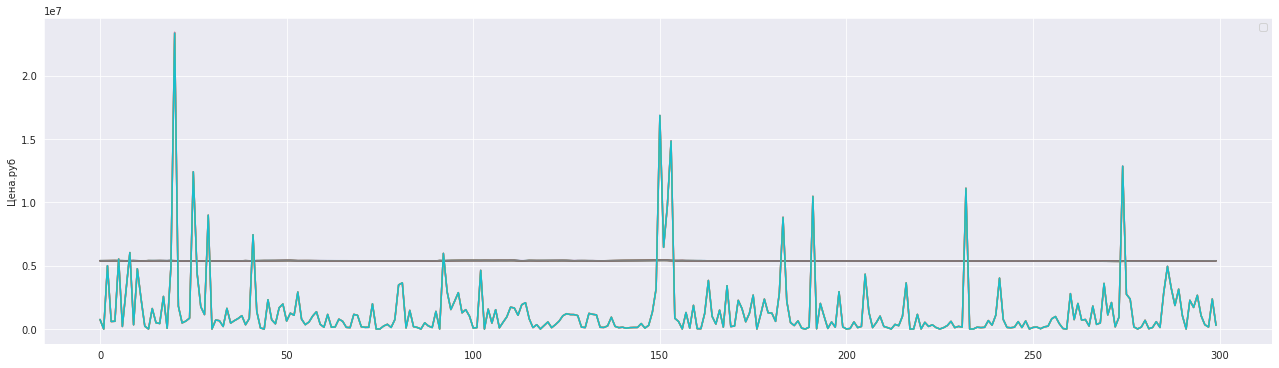

In [ ]:
start = 100            
length = 300 

chanelNames = ['OPEN * MAX', 'OPEN * MIN', 'OPEN * CLOSE', 'OPEN * VOLUME'
               
               'MAX * MIN', 'MAX * CLOSE', 'MAX * VOLUME', 'MIN * CLOSE', 
               
               'MIN * VOLUME', 'CLOSE * VOLUME']

plt.figure(figsize=(22,6))
for i in range(35,45):
  plt.plot(data[start:start+length,i])
plt.ylabel('Цена.руб')
plt.legend()
plt.show()

#### Обратное значение каналов:


No handles with labels found to put in legend.


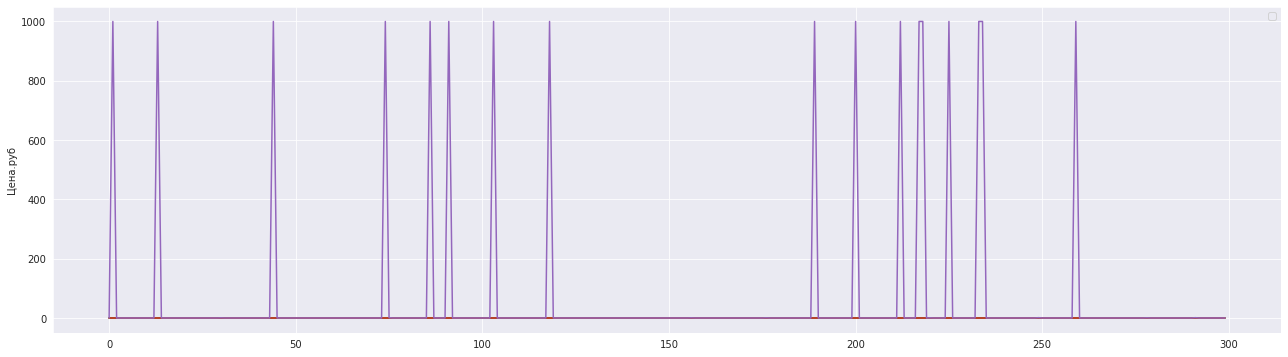

In [ ]:
start = 100            
length = 300 

chanelNames = ['rev_OPEN', 'rev_MAX', 'rev_MIN', 'rev_CLOSE', 'rev_VOLUME']

plt.figure(figsize=(22,6))
for i in range(45,50):
  plt.plot(data[start:start+length,i])
plt.ylabel('Цена.руб')
plt.legend()
plt.show()

#### Первые производные каналов:


No handles with labels found to put in legend.


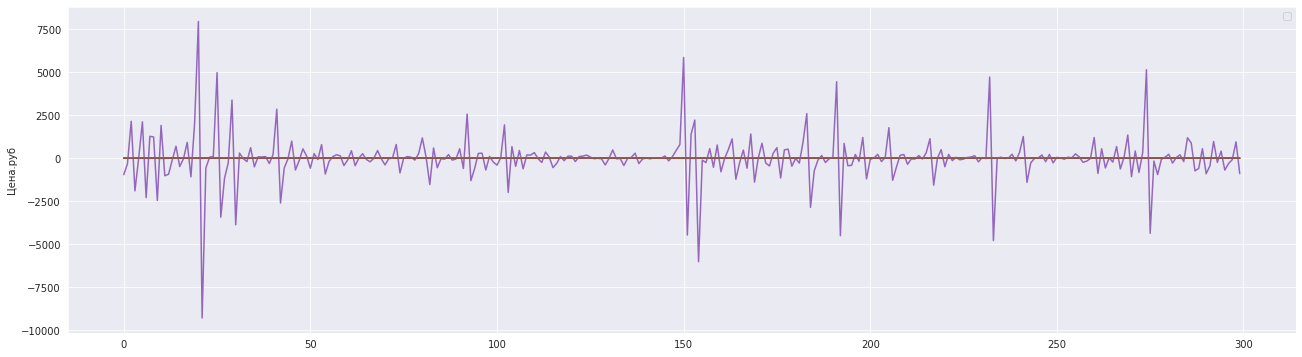

In [ ]:
start = 100            
length = 300 

chanelNames = ['diff_OPEN', 'diff_MAX', 'diff_MIN', 'diff_CLOSE', 'diff_VOLUME']

plt.figure(figsize=(22,6))
for i in range(50,56):
  plt.plot(data[start:start+length,i])
plt.ylabel('Цена.руб')
plt.legend()
plt.show()

#### Вторые производные каналов:

No handles with labels found to put in legend.


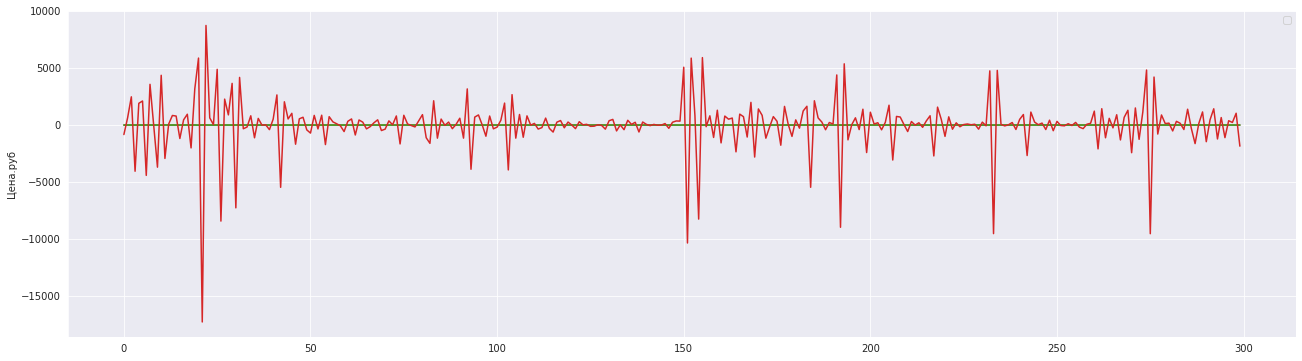

In [ ]:
start = 100            
length = 300 

chanelNames = ['diff2_OPEN', 'diff2_MAX', 'diff2_MIN', 'diff2_CLOSE', 'diff2_VOLUME']

plt.figure(figsize=(22,6))
for i in range(56,60):
  plt.plot(data[start:start+length,i])
plt.ylabel('Цена.руб')
plt.legend()
plt.show()

## Задание 2. Сделайте предсказание нейросети, сравните эталонный сигнал с  настоящим. При формировании входного сигнала используйте:

## Загрузка данных

 ### 2.1  -  100 точек с шагом назад по 1

In [ ]:
xLen = 100                               # Анализ по xLen прошедшим точкам
valLen = 40002                           # Кол-во на проверочную выборку

trainLen = data.shape[0] - valLen

# Разделяем данные на тренировочную и тестовую выборки

xTrain, xTest = data[:trainLen], data[trainLen+xLen+2:]

# Проводим нормирование данных
xScaler = MinMaxScaler()
xScaler.fit(xTrain)
xTrain = xScaler.transform(xTrain)
xTest = xScaler.transform(xTest)


In [ ]:
# Cделаем reshape, т.к. у нас только один столбец по одному значению

yTrain, yTest = np.reshape(data[:trainLen, 3], (-1,1)), np.reshape(data[trainLen+xLen+2:, 3], (-1,1))

# Проводим нормирование данных
yScaler = MinMaxScaler()
yScaler.fit(yTrain)
yTrain = yScaler.transform(yTrain)
yTest = yScaler.transform(yTest)

In [ ]:
# Создаем генератор для обучающей выборки
trainDataGen = TimeseriesGenerator(xTrain, yTrain, length=xLen, stride=1, sampling_rate=1, batch_size=20)

# Аналогично для валидационной выборки
testDataGen = TimeseriesGenerator(xTest, yTest, length=xLen, stride=1, batch_size=20)

In [ ]:
DataGen = TimeseriesGenerator(xTest, yTest, length=xLen, sampling_rate=1, batch_size=len(xTest))

xVal =[]
yVal = []
for i in DataGen:
  xVal.append(i[0])
  yVal.append(i[1])

xVal = np.array(xVal)
yVal = np.array(yVal)

## Дополнительные функции визуализации результатов

In [ ]:
# Функция для рассчета результата прогнозирования сети
def getPred(currModel, xVal, yVal, yScaler):
  predVal = yScaler.inverse_transform(currModel.predict(xVal))
  yValUnscaled = yScaler.inverse_transform(yVal)
  return (predVal, yValUnscaled)                  # Возврат предсказанного результата и реальных данных

In [ ]:
# Функция визуализации графиков предсказания и реальных данных
def showPredict(start, step, channel, predVal, yValUnscaled):
  plt.figure(figsize=(22,6))
  plt.plot(predVal[start:start+step, 0], label = 'Прогноз')
  plt.plot(yValUnscaled[start:start+step, channel], label='Базовый ряд')
  plt.xlabel('Время')
  plt.ylabel('Значение Close')
  plt.legend()
  plt.show()

In [ ]:
# Рассчет корреляции двух векторов
def correlate(a,b):
  ma = a.mean()
  mb = b.mean()
  mab = (a*b).mean()
  sa = a.std()
  sb = b.std()

  val = 1
  if ((sa>0) & (sb>0)):
    val = (mab-ma*mb) / (sa*sb)
  return val

In [ ]:
# Функция отрисовки графика корреляции со смещением шага для проверки автокорреляции
def showCorr(channels, corrSteps, predVal, yValUnscaled):
  for ch in channels:
    corr = [] 
    yLen = yValUnscaled.shape[0] 

    # C помощью цикла изменяем шаг
    for i in range(corrSteps):
      corr.append(correlate(yValUnscaled[:yLen-i,ch], predVal[i:, 0]))

    own_corr = []  # Список для эталонного грфика автокорреляции, к которому нужно стремиться

    for i in range(corrSteps):
      own_corr.append(correlate(yValUnscaled[:yLen-i,ch], yValUnscaled[i:, ch]))

    plt.figure(figsize=(14,7))
    plt.plot(corr, label='Предсказание на ' + str(ch+1) + ' шаг')   # Для предсказанных значений
    plt.plot(own_corr, label='Эталон')                              # Для эталона

  plt.xlabel('Время')
  plt.ylabel('Значение')
  plt.legend()
  plt.show()

## Нейронная сеть с Dense слоем

In [ ]:
modelD = Sequential()
modelD.add(Dense(200, input_shape=(xLen,60), activation='relu'))
modelD.add(Dense(150,activation='relu'))
modelD.add(Flatten())
#modelD.add(Dropout(0.4))
modelD.add(Dense(1,activation='linear'))

modelD.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))

modelD.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100, 200)          12200     
_________________________________________________________________
dense_2 (Dense)              (None, 100, 150)          30150     
_________________________________________________________________
flatten (Flatten)            (None, 15000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15001     
Total params: 57,351
Trainable params: 57,351
Non-trainable params: 0
_________________________________________________________________


### lr = 1e-4

In [ ]:
# Обучение
historyD = modelD.fit(trainDataGen, epochs=30, validation_data=testDataGen)

Epoch 1/30
22089/22089 [==============================] - 130s 6ms/step - loss: 2.3698e-04 - val_loss: 3.1709e-05
Epoch 2/30
22089/22089 [==============================] - 126s 6ms/step - loss: 3.9765e-05 - val_loss: 8.9742e-06
Epoch 3/30
22089/22089 [==============================] - 127s 6ms/step - loss: 2.8665e-05 - val_loss: 7.3340e-06
Epoch 4/30
22089/22089 [==============================] - 126s 6ms/step - loss: 2.7311e-05 - val_loss: 3.5405e-05
Epoch 5/30
22089/22089 [==============================] - 126s 6ms/step - loss: 2.1574e-05 - val_loss: 1.4752e-04
Epoch 6/30
22089/22089 [==============================] - 126s 6ms/step - loss: 2.0096e-05 - val_loss: 9.6453e-06
Epoch 7/30
22089/22089 [==============================] - 126s 6ms/step - loss: 1.7950e-05 - val_loss: 3.7125e-06
Epoch 8/30
22089/22089 [==============================] - 126s 6ms/step - loss: 1.6698e-05 - val_loss: 3.0086e-06
Epoch 9/30
22089/22089 [==============================] - 124s 6ms/step - loss: 1.3613e-

### Уменьшаем шаг обучения lr=1e-5

In [ ]:
modelD.compile(loss="mse", optimizer=Adam(lr=1e-5))
historyD = modelD.fit(trainDataGen, epochs=30, verbose=1, validation_data = testDataGen)

Epoch 1/30
22089/22089 [==============================] - 117s 5ms/step - loss: 1.0357e-06 - val_loss: 1.1452e-06
Epoch 2/30
22089/22089 [==============================] - 117s 5ms/step - loss: 9.9161e-07 - val_loss: 1.1398e-06
Epoch 3/30
22089/22089 [==============================] - 117s 5ms/step - loss: 9.5160e-07 - val_loss: 1.1183e-06
Epoch 4/30
22089/22089 [==============================] - 116s 5ms/step - loss: 9.0296e-07 - val_loss: 1.0457e-06
Epoch 5/30
22089/22089 [==============================] - 115s 5ms/step - loss: 8.5524e-07 - val_loss: 1.3541e-06
Epoch 6/30
22089/22089 [==============================] - 116s 5ms/step - loss: 8.3089e-07 - val_loss: 9.6956e-07
Epoch 7/30
22089/22089 [==============================] - 115s 5ms/step - loss: 7.8205e-07 - val_loss: 1.1187e-06
Epoch 8/30
22089/22089 [==============================] - 115s 5ms/step - loss: 7.1828e-07 - val_loss: 1.1905e-06
Epoch 9/30
22089/22089 [==============================] - 114s 5ms/step - loss: 6.8626e-

#### График lr=1e-5

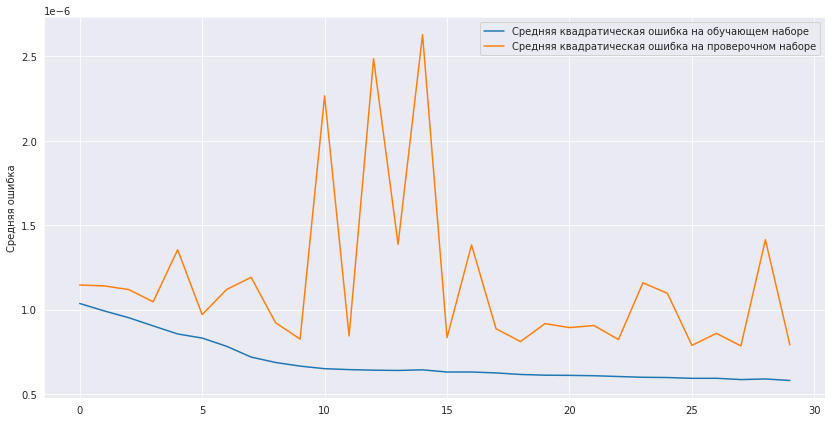

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(historyD.history['loss'], label='Средняя квадратическая ошибка на обучающем наборе')
plt.plot(historyD.history['val_loss'], label='Средняя квадратическая ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

### Прогноз данных, отображение на графике

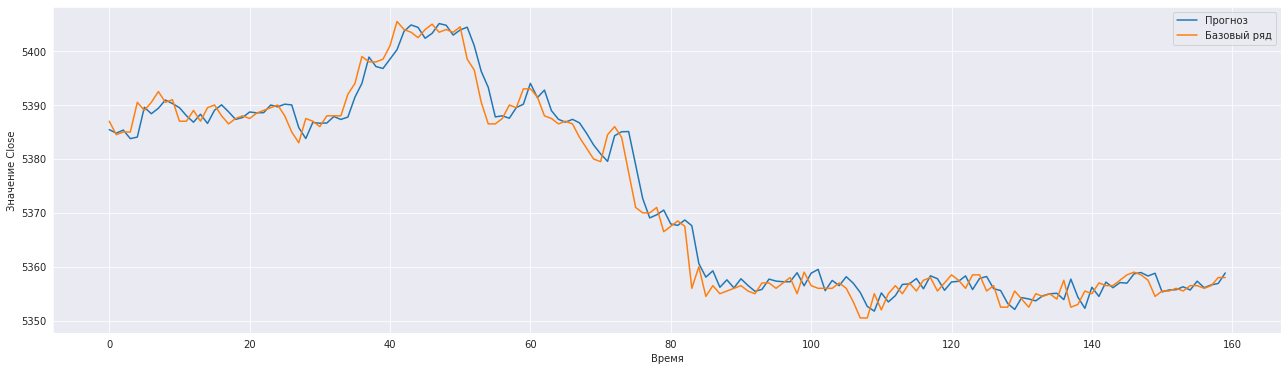

In [ ]:
(predVal_D, yValUnscaled_D) = getPred(modelD, xVal[0], yVal[0], yScaler)   # Прогноз данных
showPredict(0, 160, 0, predVal_D, yValUnscaled_D)

### График корреляции

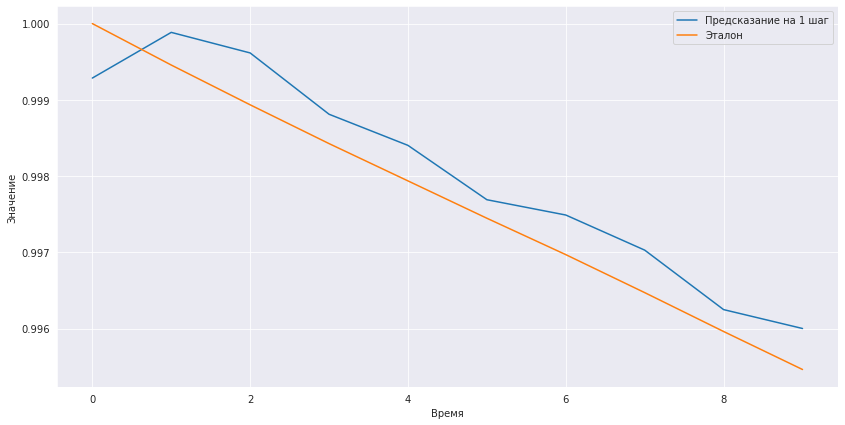

In [ ]:
showCorr([0], 10, predVal_D, yValUnscaled_D)

### График корреляции со смещением шага

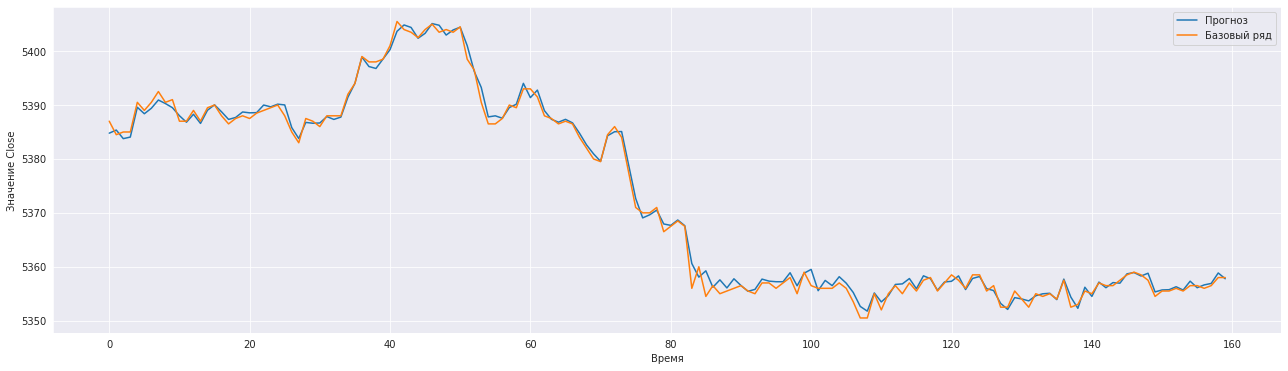

In [ ]:
showPredict(0,160,0, predVal_D[1:], yValUnscaled_D[:-1])

## Попробуем подать те же данные в нейроннуя сеть с Conv1D и посмотреть на результат. 

In [ ]:
modelC = Sequential()
modelC.add(Conv1D(64,5, input_shape=(xLen,60), activation='relu'))
modelC.add(Conv1D(64,5, activation='relu'))
modelC.add(MaxPooling1D())
modelC.add(Flatten())
modelC.add(Dense(150, activation='relu'))
modelC.add(Dense(1, activation='linear'))

modelC.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))

### Шаг обучения lr=1e-4

In [ ]:
# Обучение
historyС = modelC.fit(trainDataGen, epochs=30, verbose=1, validation_data=testDataGen)

Epoch 1/30
22089/22089 [==============================] - 109s 3ms/step - loss: 3.9091e-04 - val_loss: 4.6038e-05
Epoch 2/30
22089/22089 [==============================] - 79s 4ms/step - loss: 6.1699e-05 - val_loss: 6.6237e-05
Epoch 3/30
22089/22089 [==============================] - 77s 3ms/step - loss: 3.3272e-05 - val_loss: 1.2427e-05
Epoch 4/30
22089/22089 [==============================] - 77s 3ms/step - loss: 2.7787e-05 - val_loss: 2.8425e-05
Epoch 5/30
22089/22089 [==============================] - 78s 4ms/step - loss: 2.4557e-05 - val_loss: 7.7173e-06
Epoch 6/30
22089/22089 [==============================] - 77s 3ms/step - loss: 2.3004e-05 - val_loss: 5.3800e-06
Epoch 7/30
22089/22089 [==============================] - 77s 3ms/step - loss: 1.9510e-05 - val_loss: 3.6439e-05
Epoch 8/30
22089/22089 [==============================] - 79s 4ms/step - loss: 1.8741e-05 - val_loss: 6.8732e-05
Epoch 9/30
22089/22089 [==============================] - 79s 4ms/step - loss: 1.6005e-05 - val

### Меняем шаг обучения lr=1e-5

In [ ]:
modelC.compile(loss='mse', optimizer=Adam(learning_rate=1e-5))
historyС = modelC.fit(trainDataGen, epochs=30, verbose=1, validation_data=testDataGen)

Epoch 1/30
22089/22089 [==============================] - 82s 4ms/step - loss: 1.9703e-06 - val_loss: 2.6261e-06
Epoch 2/30
22089/22089 [==============================] - 82s 4ms/step - loss: 1.7955e-06 - val_loss: 1.7692e-06
Epoch 3/30
22089/22089 [==============================] - 81s 4ms/step - loss: 1.6630e-06 - val_loss: 1.6695e-06
Epoch 4/30
22089/22089 [==============================] - 83s 4ms/step - loss: 1.6108e-06 - val_loss: 1.7751e-06
Epoch 5/30
22089/22089 [==============================] - 79s 4ms/step - loss: 1.5485e-06 - val_loss: 7.3133e-06
Epoch 6/30
22089/22089 [==============================] - 80s 4ms/step - loss: 1.4729e-06 - val_loss: 1.9255e-06
Epoch 7/30
22089/22089 [==============================] - 80s 4ms/step - loss: 1.4168e-06 - val_loss: 1.6267e-06
Epoch 8/30
22089/22089 [==============================] - 82s 4ms/step - loss: 1.3654e-06 - val_loss: 1.5595e-06
Epoch 9/30
22089/22089 [==============================] - 81s 4ms/step - loss: 1.3265e-06 - val_

#### График lr=1e-5

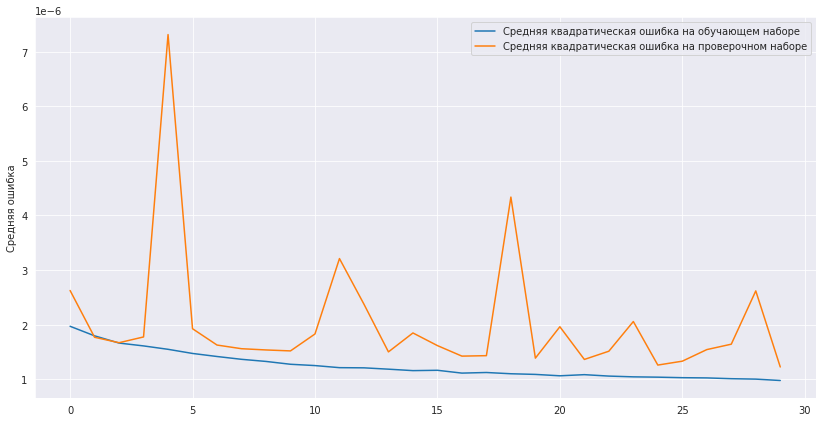

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(historyС.history['loss'], label='Средняя квадратическая ошибка на обучающем наборе')
plt.plot(historyС.history['val_loss'], label='Средняя квадратическая ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

### Прогноз данных, отображение на графике (lr=1e-5)

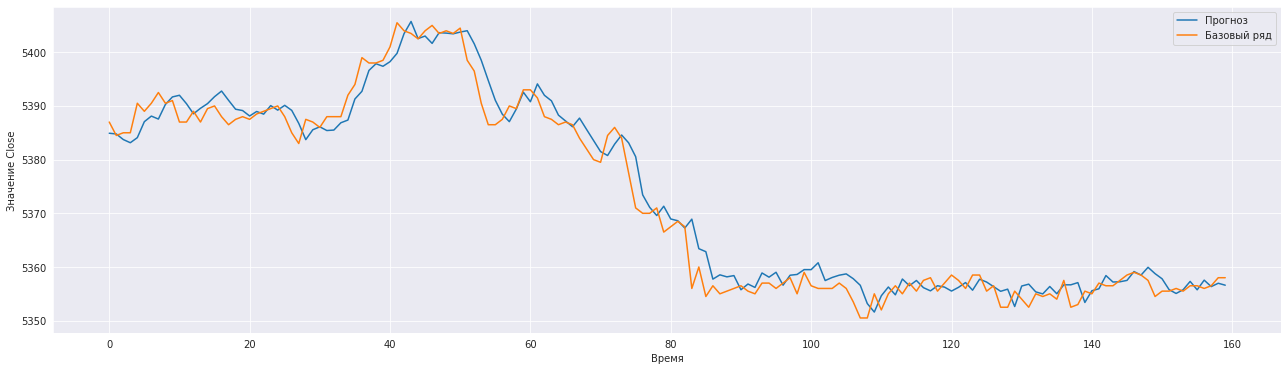

In [ ]:
(predVal_C, yValUnscaled_C) = getPred(modelC, xVal[0], yVal[0], yScaler)   # Прогноз данных
showPredict(0,160,0, predVal_C, yValUnscaled_C)


### График корреляции (lr=1e-5)

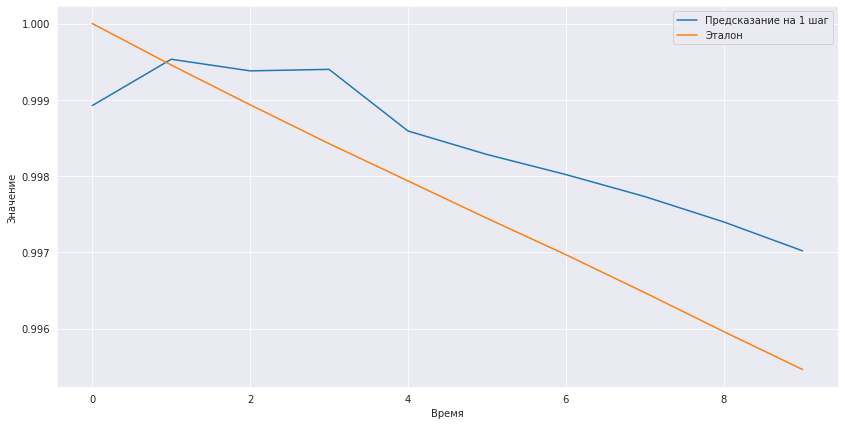

In [ ]:
showCorr([0], 10, predVal_C, yValUnscaled_C)

### График корреляции со смещением шага (lr=1e-5)

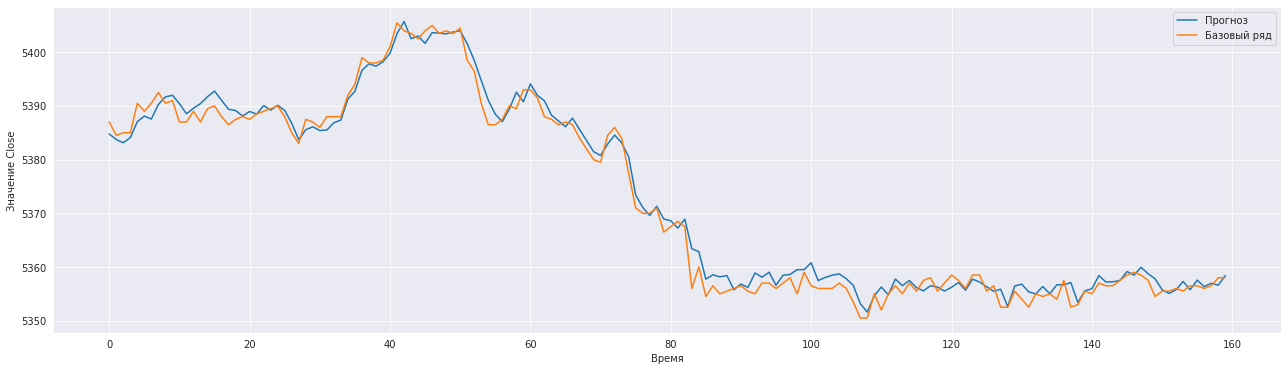

In [ ]:
showPredict(0,160,0, predVal_C[1:], yValUnscaled_C[:-1])

## Задание 2.2  - 100 точек с шагом назад по 10 (или сами точки, или среднее по отрезку в 10 точек)

При формировании входного сигнала в отличии от первого задания будем используйте 100 точек с шагом назад по 10.

Для этого параметр stride возьмем равным 10.

In [ ]:
xLen = 100
valLen = 40002

trainLen = len(data) - valLen   # размер тренировочной выборки

xTrain, xTest = data[:trainLen], data[trainLen+xLen+2:]

# Нормируем данные

xScaler = MinMaxScaler()
xScaler.fit(xTrain)
xTrain = xScaler.transform(xTrain)
xTest = xScaler.transform(xTest)

In [ ]:
# Аналогично для тестовой выборки

yTrain, yTest = np.reshape(data[:trainLen,3],(-1,1)), np.reshape(data[trainLen+xLen+2:,3],(-1,1))

yScaler = MinMaxScaler()
yScaler.fit(yTrain)
yTrain = yScaler.transform(yTrain)
yTest = yScaler.transform(yTest)

In [ ]:
# Создаем генераторы с шагом 10

trainDataGen = TimeseriesGenerator(xTrain, yTrain, length=xLen, stride=10,   # stride =10
                                   sampling_rate=1, batch_size=20)


In [ ]:
testDataGen = TimeseriesGenerator(xTest, yTest, length=xLen, stride=10,
                                  sampling_rate=1, batch_size=20)

In [ ]:
DataGen = TimeseriesGenerator(xTest, yTest, length=xLen, sampling_rate=1, batch_size=len(xTest))

xVal =[]
yVal = []
for i in DataGen:
  xVal.append(i[0])
  yVal.append(i[1])

xVal = np.array(xVal)
yVal = np.array(yVal)

## Возьмем ту же архитектуру нейронной сети с Dense слоем

Входные данные: 100 точек с шагом назад по 10

In [ ]:
modelD_10 = Sequential()
modelD_10.add(Dense(200, input_shape=(xLen,60), activation='relu'))
modelD_10.add(Dense(150,activation='relu'))
modelD_10.add(Flatten())
#modelD_10.add(Dropout(0.4))
modelD_10.add(Dense(1,activation='linear'))

modelD_10.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))

modelD_10.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100, 200)          12200     
_________________________________________________________________
dense_3 (Dense)              (None, 100, 150)          30150     
_________________________________________________________________
flatten_1 (Flatten)          (None, 15000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 15001     
Total params: 57,351
Trainable params: 57,351
Non-trainable params: 0
_________________________________________________________________


### lr = 1e-4

In [ ]:
# Обучение
historyD_10 = modelD_10.fit(trainDataGen, epochs=30, validation_data=testDataGen)

Epoch 1/30
2209/2209 [==============================] - 9s 4ms/step - loss: 9.2250e-04 - val_loss: 6.6013e-04
Epoch 2/30
2209/2209 [==============================] - 10s 5ms/step - loss: 2.7551e-04 - val_loss: 6.5065e-04
Epoch 3/30
2209/2209 [==============================] - 10s 5ms/step - loss: 1.7965e-04 - val_loss: 4.0646e-05
Epoch 4/30
2209/2209 [==============================] - 10s 5ms/step - loss: 1.3421e-04 - val_loss: 3.8756e-05
Epoch 5/30
2209/2209 [==============================] - 10s 5ms/step - loss: 1.1057e-04 - val_loss: 4.2885e-05
Epoch 6/30
2209/2209 [==============================] - 10s 5ms/step - loss: 6.2631e-05 - val_loss: 6.1177e-05
Epoch 7/30
2209/2209 [==============================] - 11s 5ms/step - loss: 6.4054e-05 - val_loss: 2.5837e-05
Epoch 8/30
2209/2209 [==============================] - 11s 5ms/step - loss: 5.2511e-05 - val_loss: 2.8216e-05
Epoch 9/30
2209/2209 [==============================] - 10s 5ms/step - loss: 5.4378e-05 - val_loss: 1.2385e-04
Ep

### Уменьшаем шаг обучения lr=1e-5

In [ ]:
modelD_10.compile(loss="mse", optimizer=Adam(lr=1e-5))
historyD_10 = modelD_10.fit(trainDataGen, epochs=30, verbose=1, validation_data = testDataGen)

Epoch 1/30
2209/2209 [==============================] - 10s 5ms/step - loss: 3.6035e-06 - val_loss: 9.8568e-06
Epoch 2/30
2209/2209 [==============================] - 9s 4ms/step - loss: 3.5728e-06 - val_loss: 9.7153e-06
Epoch 3/30
2209/2209 [==============================] - 10s 4ms/step - loss: 3.3499e-06 - val_loss: 6.8869e-06
Epoch 4/30
2209/2209 [==============================] - 10s 5ms/step - loss: 3.3806e-06 - val_loss: 7.2376e-06
Epoch 5/30
2209/2209 [==============================] - 10s 5ms/step - loss: 3.2749e-06 - val_loss: 6.6234e-06
Epoch 6/30
2209/2209 [==============================] - 10s 5ms/step - loss: 2.9694e-06 - val_loss: 1.3160e-05
Epoch 7/30
2209/2209 [==============================] - 10s 4ms/step - loss: 2.7067e-06 - val_loss: 2.1411e-05
Epoch 8/30
2209/2209 [==============================] - 10s 4ms/step - loss: 2.7446e-06 - val_loss: 4.8622e-06
Epoch 9/30
2209/2209 [==============================] - 10s 4ms/step - loss: 2.6511e-06 - val_loss: 4.7311e-06
Ep

#### График lr=1e-5

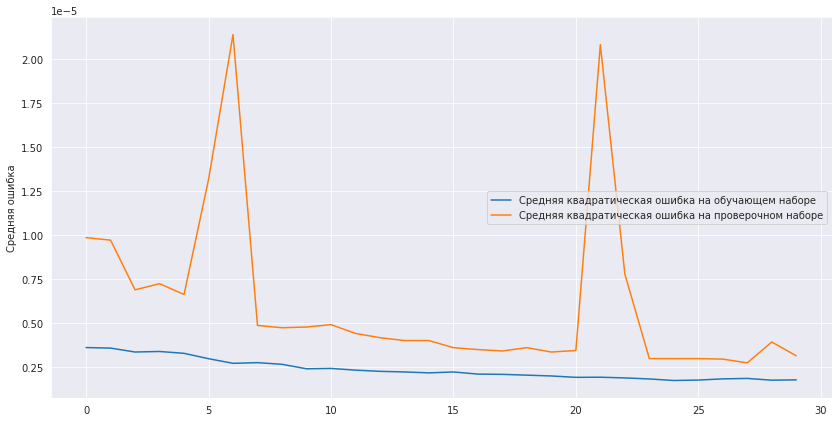

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(historyD_10.history['loss'], label='Средняя квадратическая ошибка на обучающем наборе')
plt.plot(historyD_10.history['val_loss'], label='Средняя квадратическая ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

### Прогноз данных, отображение на графике

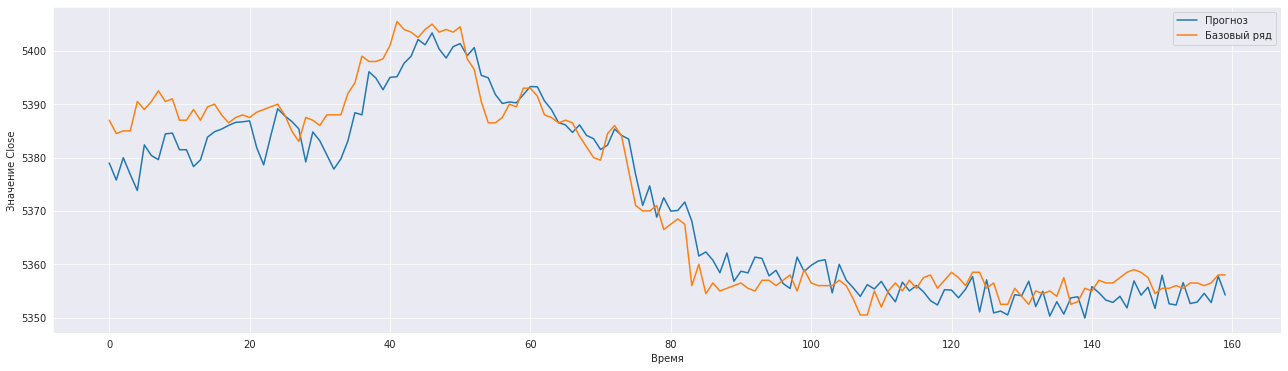

In [ ]:
(predValD_10, yValUnscaledD_10) = getPred(modelD_10, xVal[0], yVal[0], yScaler)   # Прогноз данных
showPredict(0, 160, 0, predValD_10, yValUnscaledD_10)

### График корреляции

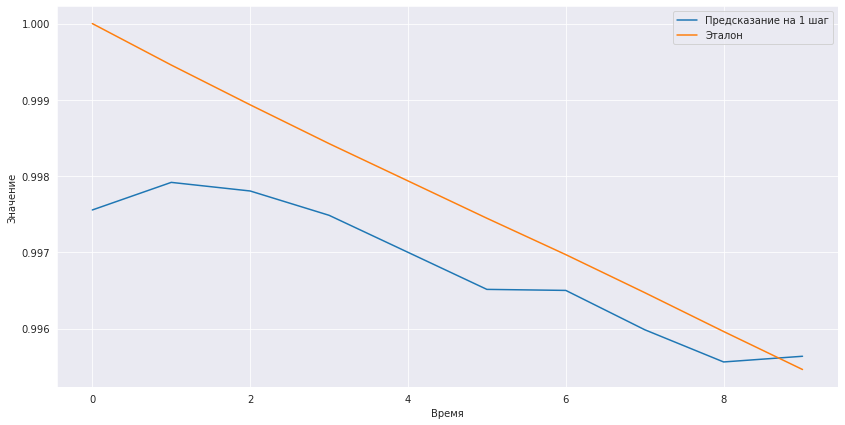

In [ ]:
showCorr([0], 10, predValD_10, yValUnscaledD_10)

### График корреляции со смещением шага

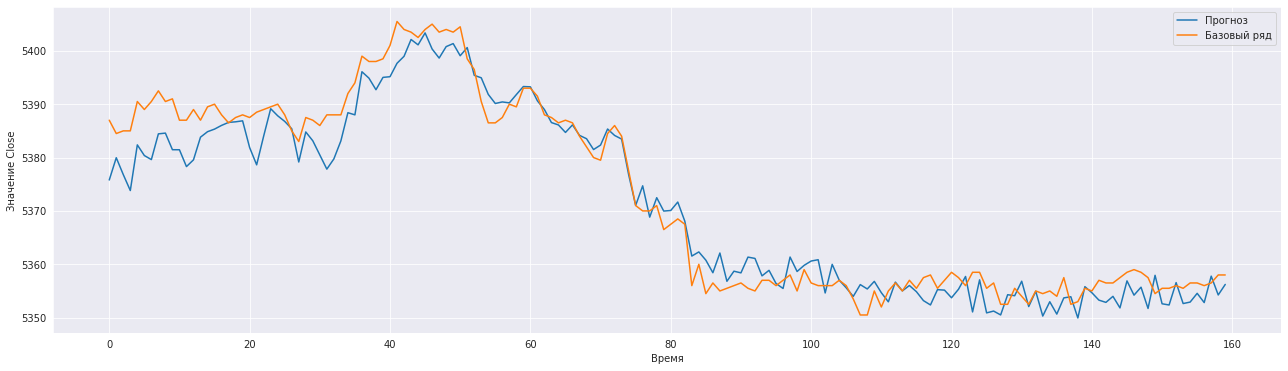

In [ ]:
showPredict(0,160,0, predValD_10[1:], yValUnscaledD_10[:-1])

## Попробуем подать те же данные в нейроннуя сеть с LSTM и посмотреть на результат. 

In [ ]:
model_LSTM_10 = Sequential()
model_LSTM_10.add(LSTM(5, input_shape=(xLen,60)))
model_LSTM_10.add(Dense(10, activation='relu'))
model_LSTM_10.add(Dense(1,activation='linear'))

model_LSTM_10.compile(loss='mse', optimizer=Adam(learning_rate=1e-5))

In [ ]:
model_LSTM_10.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 220       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


### Обучение сети (шаг обучения lr=1e-5)

In [ ]:
history_LSTM_10 = model_LSTM_10.fit(trainDataGen, epochs=20, verbose=1, validation_data=testDataGen )

Epoch 1/20
2209/2209 [==============================] - 17s 7ms/step - loss: 0.2559 - val_loss: 0.2676
Epoch 2/20
2209/2209 [==============================] - 15s 7ms/step - loss: 0.0458 - val_loss: 0.1003
Epoch 3/20
2209/2209 [==============================] - 14s 7ms/step - loss: 0.0204 - val_loss: 0.0324
Epoch 4/20
2209/2209 [==============================] - 15s 7ms/step - loss: 0.0072 - val_loss: 0.0057
Epoch 5/20
2209/2209 [==============================] - 15s 7ms/step - loss: 0.0020 - val_loss: 1.6570e-04
Epoch 6/20
2209/2209 [==============================] - 14s 6ms/step - loss: 6.2878e-04 - val_loss: 1.3635e-04
Epoch 7/20
2209/2209 [==============================] - 14s 6ms/step - loss: 3.2089e-04 - val_loss: 2.2831e-04
Epoch 8/20
2209/2209 [==============================] - 14s 6ms/step - loss: 1.8983e-04 - val_loss: 2.7694e-04
Epoch 9/20
2209/2209 [==============================] - 15s 7ms/step - loss: 9.2824e-05 - val_loss: 1.3310e-04
Epoch 10/20
2209/2209 [==============

#### График lr=1e-5

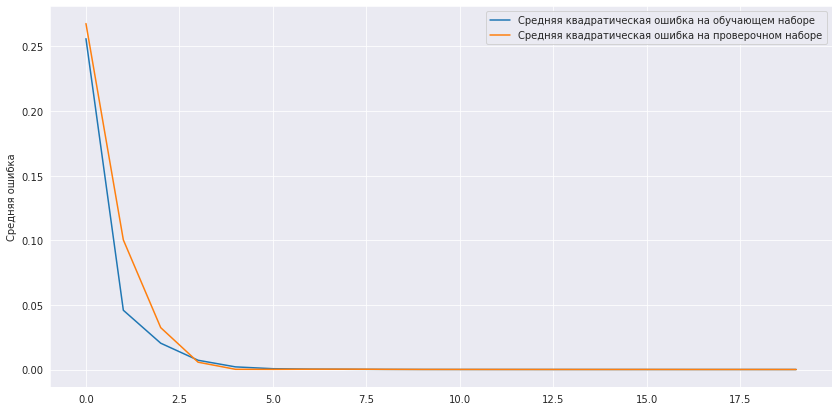

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(history_LSTM_10.history['loss'], label='Средняя квадратическая ошибка на обучающем наборе')
plt.plot(history_LSTM_10.history['val_loss'], label='Средняя квадратическая ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

### Прогноз данных, отображение на графике (lr=1e-5)

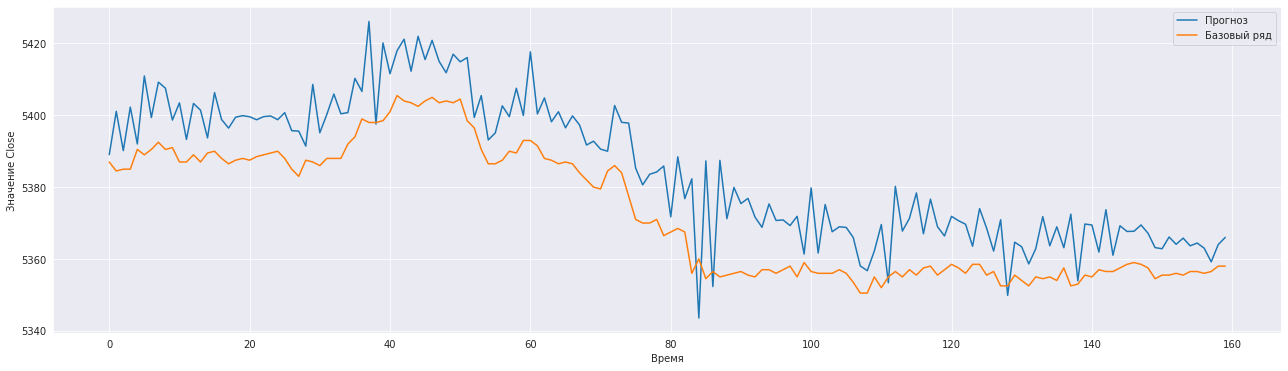

In [ ]:
(predVal_LSTM_10, yValUnscaled_LSTM_10) = getPred(model_LSTM_10, xVal[0], yVal[0], yScaler)   # Прогноз данных
showPredict(0,160,0, predVal_LSTM_10, yValUnscaled_LSTM_10)


### График корреляции (lr=1e-5)

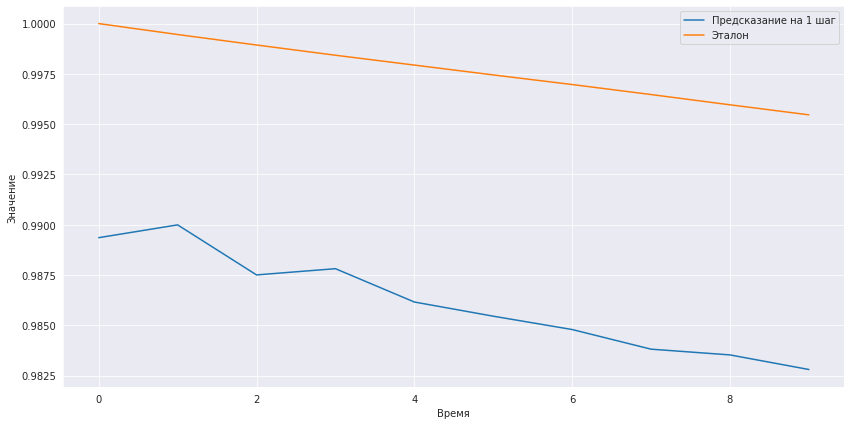

In [ ]:
showCorr([0], 10, predVal_LSTM_10, yValUnscaled_LSTM_10)

### График корреляции со смещением шага (lr=1e-5)

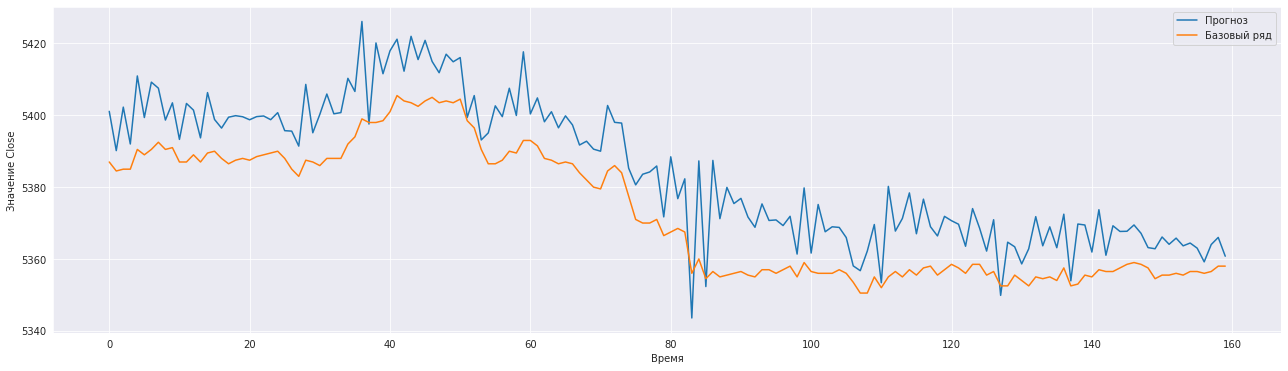

In [ ]:
showPredict(0,160,0, predVal_LSTM_10[1:], yValUnscaled_LSTM_10[:-1])

# Выводы:

1. Данная домашняя работа показала как увеличение и преобразование исходных данный влияет результат предсказания нейронной сети.
2. Как видно из графиков что результат стал намного лучше чем с меньшим кол-вом данных поданных на вход нейронной сети в качестве обучения.
3. Хороший результат показала нейронная сеть с обычными Dense слоями.
4. После изменения шага с 1 до 10, нейронная сеть дала результат хуже чем с шагом 1 (но общий тренд безусловно присутствует)
5. Для решения подобных задач, связанных с предсказанием временного ряда, не обойтись без визуализации результата на графиков и в частности без использования библиотек matplotlib и seaborn.
6. Для достижения лучшего результата требуется не только изменять гиперпараметры сети но и архитектуру, используя разные слои и подходы. 
